<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [4]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [6]:
# Read the CSV file
df = pd.read_csv('survey_data_clean.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [9]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [14]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
df_check.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [16]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [18]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [20]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [40]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])




CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [42]:
# Load actual data from the table into a real DataFrame
df = pd.read_sql_query("SELECT * FROM main", conn)

# Now df is a proper pandas DataFrame with rows and columns
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


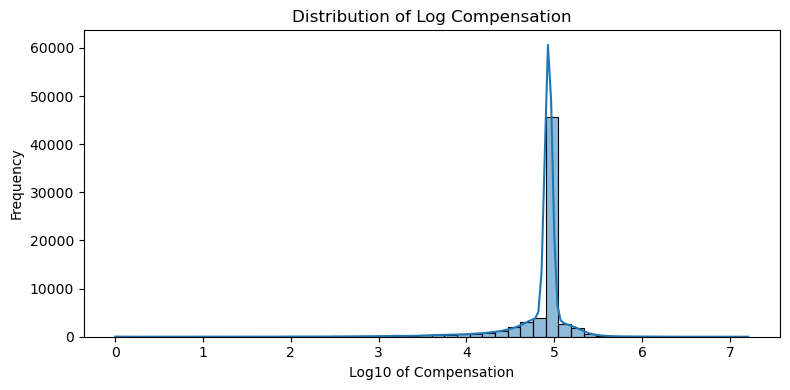

In [48]:
## Write your code here

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Optional: log-transform to reduce skewness
df['CompTotal_log'] = df['ConvertedCompYearly'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

# Use a histogram to see where the values are clustered:

plt.figure(figsize=(8, 4))
sns.histplot(df['CompTotal_log'].dropna(), bins=50, kde=True)
plt.title("Distribution of Log Compensation")
plt.xlabel("Log10 of Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Box Plots**

Plot a box plot of Age.


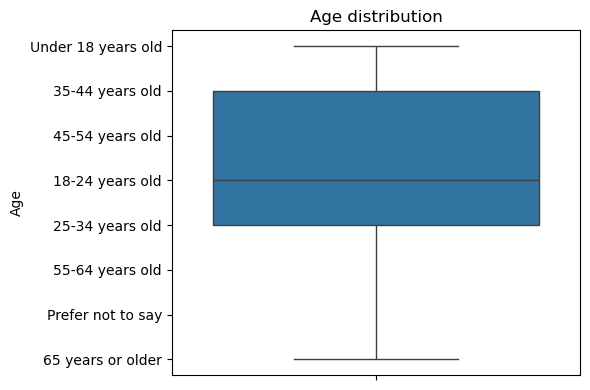

In [50]:
## Write your code here

plt.figure(figsize=(6, 4))
sns.boxplot(y='Age', data=df)

plt.title('Age distribution')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


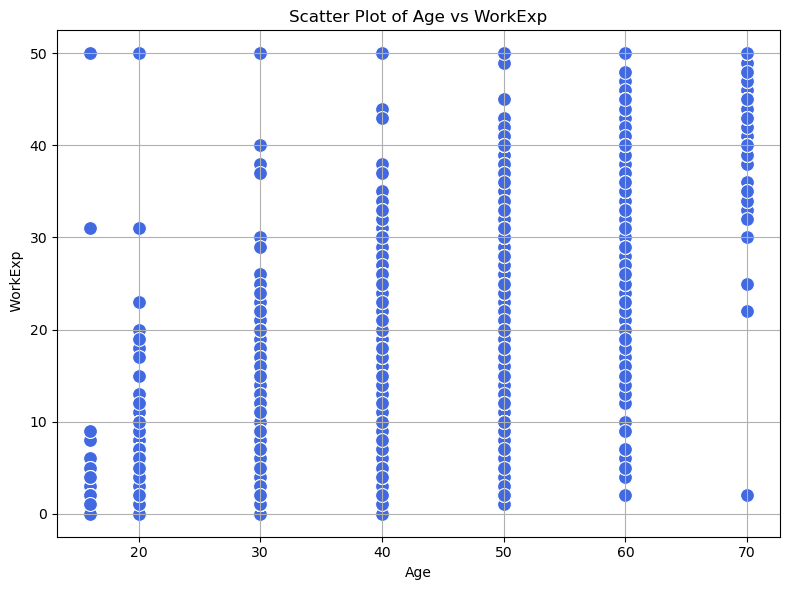

In [54]:
## Write your code here
# Maping the Age column to numeric values

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
    
}

df['AgeNumeric'] = df['Age'].map(age_map)
# df['AgeNumeric'].value_counts()

# Confirm numeric type
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AgeNumeric', y='WorkExp', color='royalblue', s=100)

# Labels and title
plt.title('Scatter Plot of Age vs WorkExp')
plt.xlabel('Age')
plt.ylabel(' WorkExp')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [ ]:
df_clean

C:\Users\serge\AppData\Local\Temp\ipykernel_10800\1847919514.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


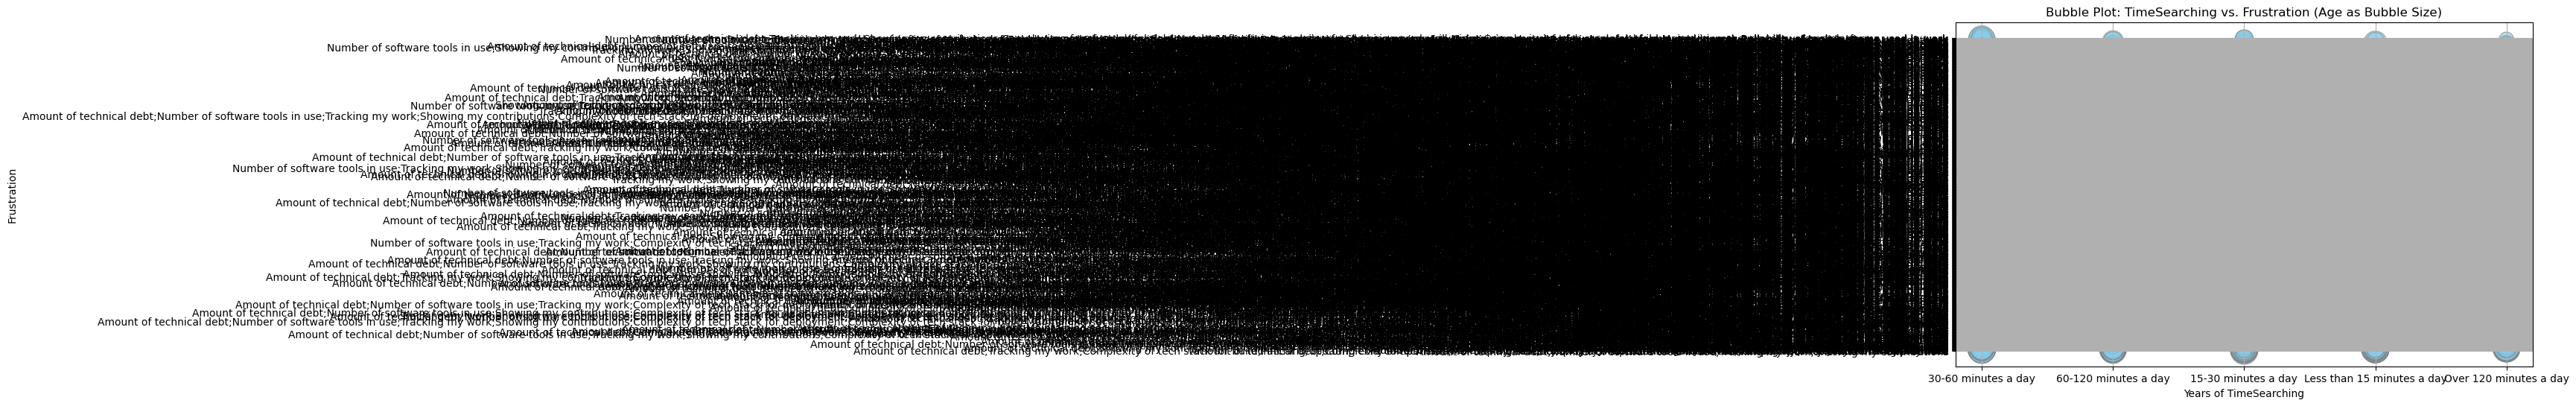

In [58]:
## Write your code here
# Clean up the data (ensure all columns used have valid numeric values)
df_clean = df.dropna(subset=['TimeSearching', 'Frustration', 'AgeNumeric'])
# Create bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['TimeSearching'],                  # X-axis
    df_clean['Frustration'],           # Y-axis
    s=df_clean['AgeNumeric'] * 10,             # Bubble size (scaled)
    alpha=0.6,
    color='skyblue',
    edgecolors='gray'
)

# Labeling
plt.title('Bubble Plot: TimeSearching vs. Frustration (Age as Bubble Size)')
plt.xlabel('Years of TimeSearching')
plt.ylabel('Frustration')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
df_clean[['TimeSearching', 'Frustration', 'AgeNumeric']].head()

,TimeSearching,Frustration,AgeNumeric
10,30-60 minutes a day,Amount of technical debt;Number of software to...,40.0
12,30-60 minutes a day,Amount of technical debt;Complexity of tech st...,40.0
15,60-120 minutes a day,Amount of technical debt;Complexity of tech st...,50.0
18,15-30 minutes a day,Amount of technical debt;Tracking my work;Comp...,30.0
20,Less than 15 minutes a day,Number of software tools in use;Tracking my wo...,30.0


the plot looks messy because both TimeSearching and Frustration columns are strings with categorical or multi-choice text (not numeric), which is not suitable for a scatter or bubble plot.
TimeSearching has values like "Less than 15 minutes a day", which are strings.

Frustration has values like "Amount of technical debt;Complexity of tech stack" — multiple selections in one string.

These cannot be plotted on numeric axes without transformation.

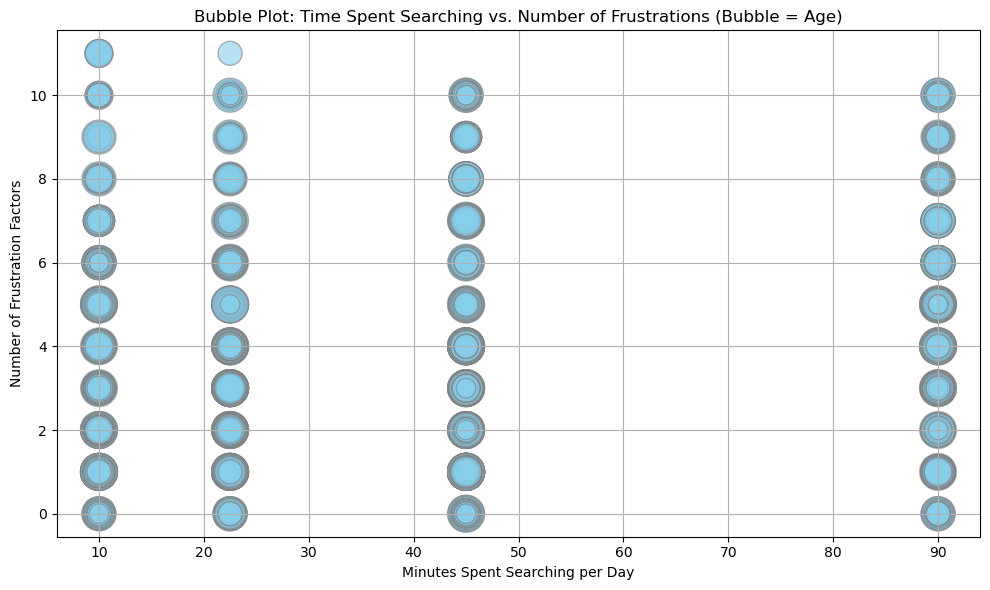

In [68]:
# Map TimeSearching to minutes:

time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}
df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_map)

# Count number of frustrations selected:

df['FrustrationCount'] = df['Frustration'].apply(lambda x: len(str(x).split(';')) if pd.notnull(x) else 0)


# Clean + Plot:

df_clean = df.dropna(subset=['TimeSearchingNumeric', 'FrustrationCount', 'AgeNumeric'])

plt.figure(figsize=(10, 6))
plt.scatter(
    df_clean['TimeSearchingNumeric'],
    df_clean['FrustrationCount'],
    s=df_clean['AgeNumeric'] * 10,
    alpha=0.6,
    color='skyblue',
    edgecolors='gray'
)

plt.title('Bubble Plot: Time Spent Searching vs. Number of Frustrations (Bubble = Age)')
plt.xlabel('Minutes Spent Searching per Day')
plt.ylabel('Number of Frustration Factors')
plt.grid(True)
plt.tight_layout()
plt.show()





### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [74]:
## Write your code here
top_5 = df['DatabaseWantToWorkWith'].value_counts().head(5)
top_5

DatabaseWantToWorkWith
PostgreSQL              3738
PostgreSQL;SQLite       1533
SQLite                  1476
Microsoft SQL Server    1431
MySQL                   1139
Name: count, dtype: int64

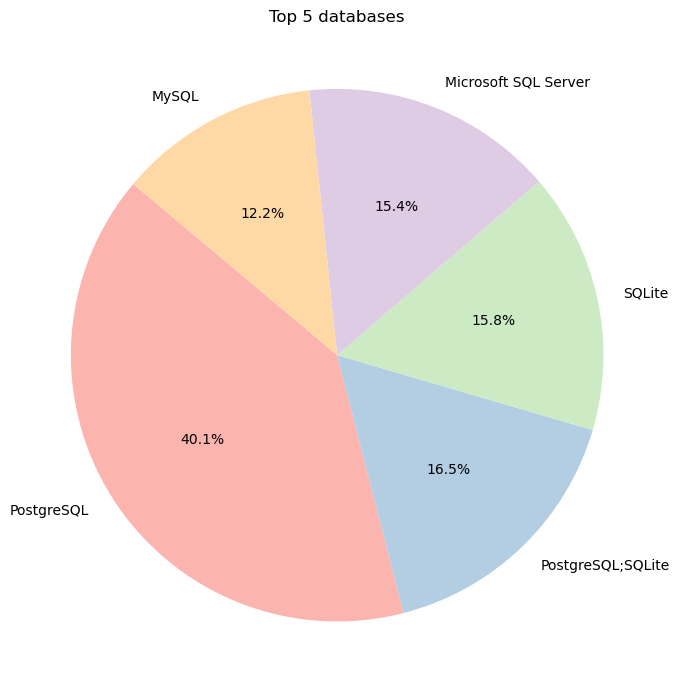

In [76]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# # Filter out rows where SurveyLength is "Unknown"
# Known_JobSat_counts_df = df[df['JobSat'] != 'Unknown']

# # Example: Get value counts of known JobSat counts
# JobSat_counts = Known_JobSat_counts_df['JobSat'].value_counts()

# Plot
plt.figure(figsize=(7, 7))
plt.pie(
    top_5 ,
    labels=top_5.index,
    autopct='%1.1f%%',  # Show percentage
    startangle=140,     # Rotate start angle for better visuals
    colors=plt.cm.Pastel1.colors  # Optional: pastel color palette
)

plt.title('Top 5 databases')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [86]:
## Write your code here

df['TimeSearching'].dropna().head(10)

10           30-60 minutes a day
12           30-60 minutes a day
15          60-120 minutes a day
18           15-30 minutes a day
20    Less than 15 minutes a day
22          60-120 minutes a day
24           15-30 minutes a day
26           30-60 minutes a day
27          60-120 minutes a day
31          60-120 minutes a day
Name: TimeSearching, dtype: object

In [96]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

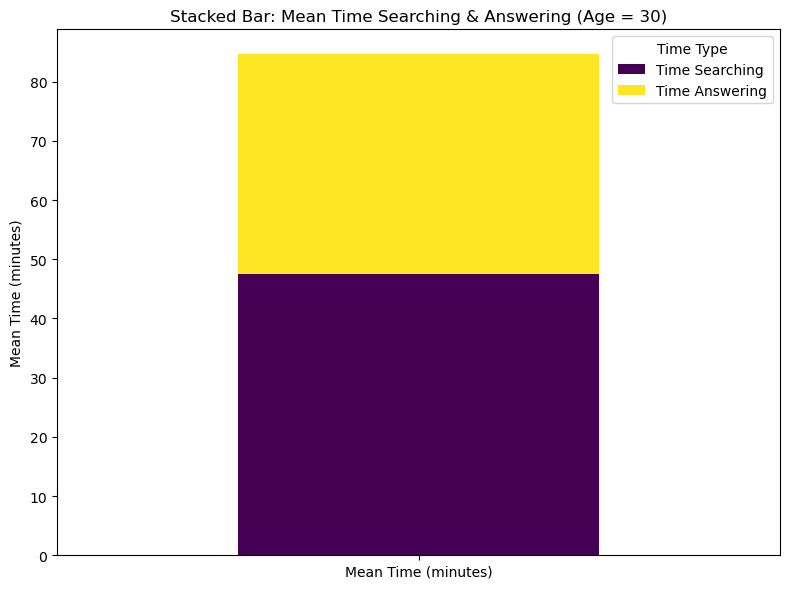

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time and age mappings
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 20,
    '30-60 minutes a day': 50,
    '60-120 minutes a day': 100
}
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Map values
df['TimeSearchingNumeric'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringNumeric'] = df['TimeAnswering'].map(time_map)
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['TimeSearchingNumeric', 'TimeAnsweringNumeric', 'AgeNumeric'])

# Filter for AgeNumeric == 30
df_filtered = df_clean[df_clean['AgeNumeric'] == 30]

# Compute mean values
mean_search = df_filtered['TimeSearchingNumeric'].mean()
mean_answer = df_filtered['TimeAnsweringNumeric'].mean()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Time Type': ['Time Searching', 'Time Answering'],
    'Mean Time (minutes)': [mean_search, mean_answer]
})

# Plot as stacked bar (2 bars stacked into 1)
plot_df.set_index('Time Type').T.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    colormap='viridis'
)

# Labels and titles
plt.title('Stacked Bar: Mean Time Searching & Answering (Age = 30)')
plt.ylabel('Mean Time (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [108]:
## Write your code here

df1 = df['CompTotal'].dropna()
df1

72       2040000.0
374        28000.0
379        85000.0
385        50000.0
389       110000.0
           ...    
65396      36000.0
65401      40000.0
65408      61000.0
65412      58000.0
65431      55000.0
Name: CompTotal, Length: 33740, dtype: float64

In [112]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

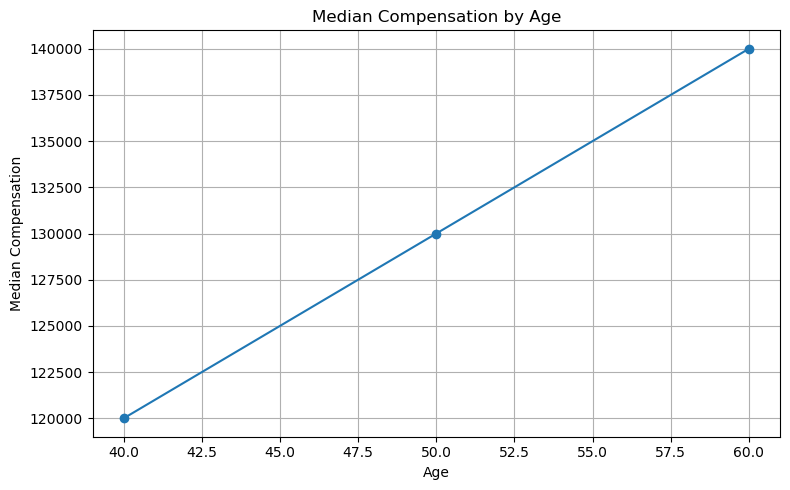

In [114]:
# Filter for AgeNumeric values of interest
df_filtered = df_clean[df_clean['AgeNumeric'].isin([40, 50, 60])]

# Group by AgeNumeric and calculate median CompTotal
median_comp_by_age = df_filtered.groupby('AgeNumeric')['CompTotal'].median().reset_index()

# Plot line graph
plt.figure(figsize=(8, 5))
plt.plot(median_comp_by_age['AgeNumeric'], median_comp_by_age['CompTotal'], marker='o', linestyle='-')
plt.title('Median Compensation by Age')
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.grid(True)
plt.tight_layout()
plt.show()




**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [149]:
# Split and explode
MainBranch_exploded = df['MainBranch'].dropna().str.split(';').explode()

# Count frequencies
MB_count = MainBranch_exploded.value_counts().reset_index()
MB_count.columns = ['MainBranch', 'Count']

# Preview
MB_count.head()


,MainBranch,Count
0,I am a developer by profession,50207
1,"I am not primarily a developer, but I write co...",6511
2,I am learning to code,3875
3,I code primarily as a hobby,3334
4,"I used to be a developer by profession, but no...",1510


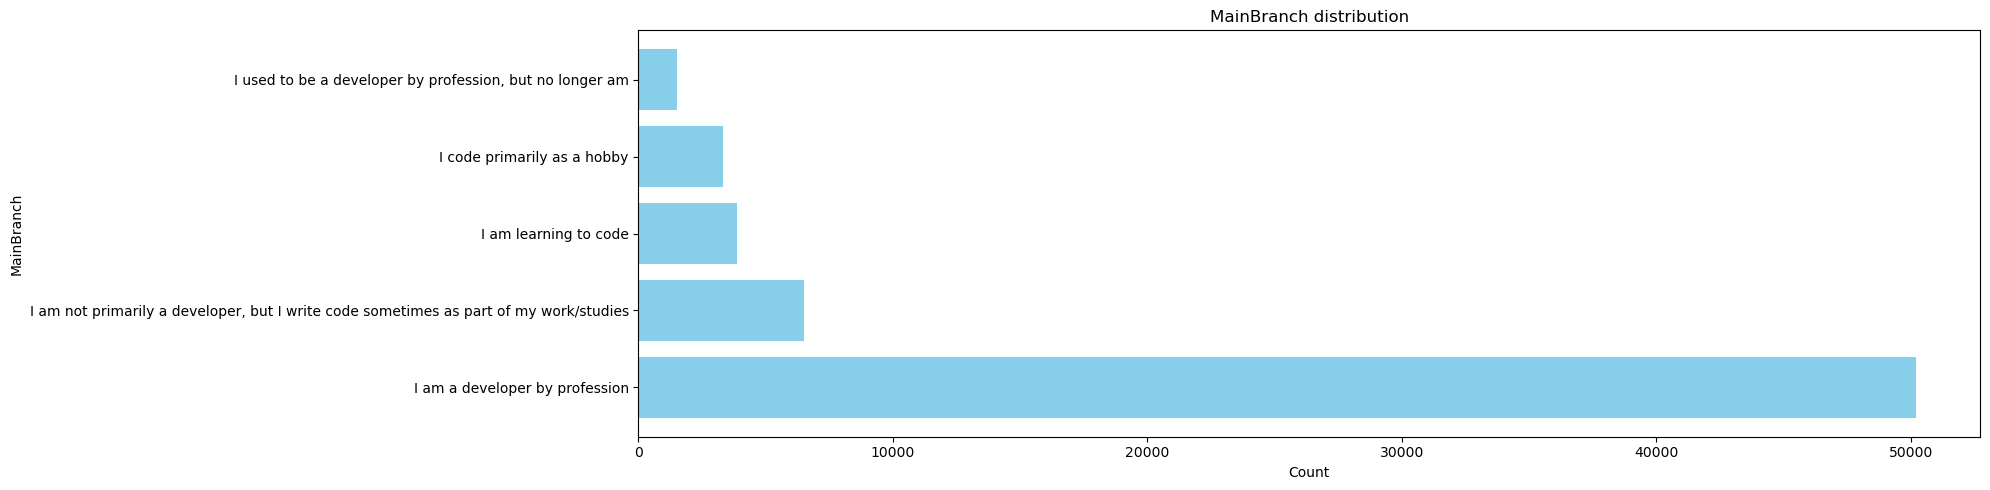

In [157]:
# Plot horizontal bar chart
plt.figure(figsize=(20, 5))
plt.barh(MB_count['MainBranch'], MB_count['Count'], color='skyblue')
plt.title('MainBranch distribution')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
